# Naïve Bayes Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn import datasets

#Reading the CSV file and storing it in the data frame object named df

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",names=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','class'])

In [2]:
#Handling
del df['Fe']
del df['Ba']

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,class
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1
...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,7
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,7


In [4]:
n= df.shape[0]  ## n denotes no. of rows or data instances
print(n)

214


In [5]:
from sklearn import tree

y = df['class']
X = df.drop('class',axis=1)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 100)

In [7]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

In [8]:
print(accuracy_score(y_test, y_pred))

0.46153846153846156


## Confusion Matrix

In [9]:
confusion_matrix(y_test,y_pred)

array([[17,  0,  0,  0,  0,  0],
       [21,  2,  0,  0,  2,  0],
       [ 2,  0,  1,  0,  0,  0],
       [ 0,  2,  0,  3,  0,  4],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  1,  0,  0,  3,  4]], dtype=int64)

Text(91.68, 0.5, 'predicted label')

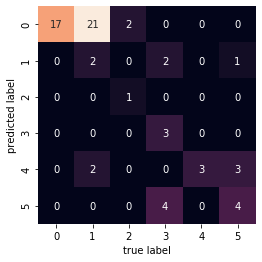

In [10]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Tuning using GridSearch CV

In [24]:
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\VIBHU GOYAL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s


GaussianNB(priors=None, var_smoothing=0.003511191734215131)


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    0.8s finished


In [25]:
y_pred = nbModel_grid.predict(X_test)
print(y_pred)

[1 7 1 1 2 1 1 1 6 6 1 2 7 1 1 1 5 1 1 1 5 7 1 7 1 1 7 1 1 1 6 1 1 2 1 7 1
 1 1 1 1 5 1 1 1 1 1 7 1 7 1 2 1 6 7 1 1 7 5 1 2 1 7 1 6]


In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[16  1  0  0  0  0]
 [21  2  0  0  2  0]
 [ 3  0  0  0  0  0]
 [ 0  2  0  4  0  3]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.5076923076923077


# K fold cross validation

In [12]:
## making our folds
## Randomly Shuffle the data
df=df.sample(frac=1)

k = 10
folds = np.array_split(df, k)

## function to perform our accuracy testing

def perform(Train, test):
    # remove labels from data
    """
    train_labels = train_set.pop('class').values
    test_labels = test_set.pop('class').values
    clf.fit(train_set, train_labels)
    
    print("Accuracy Score is:",clf.score(test_set, test_labels))
    """
    
    X_train=Train.values[:,:7]
    X_test=Train.values[:,7]
    y_train=test.values[:,:7]
    y_test=test.values[:,7]
    
    gnb=GaussianNB()
    gnb.fit(X_train,X_test)
    y_pred=gnb.predict(y_train)  # getting predictions from the classifier
    
    
    print("Accuracy score is :",accuracy_score(y_test,y_pred),'\n') # calculating accuracy
    print("Confusion Matrix is :\n\n",confusion_matrix(y_test,y_pred))
    print("\nClassification Report is as follows :\n")
    print(classification_report(y_test,y_pred))

for i in range(k):
    train = folds.copy() ##you wanna work on a copy of your array
    test = folds[i]
    del train[i]
    train = pd.concat(train, sort=False)
    print("Test set is fold number :",i+1)
    perform(train.copy(), test.copy()) ##do the fitting, here you also want to copy
    print("------------------------------------------------------------------------------------------")
    
##In this function you remove the label column from your sets and fit the scikit-classifier (clf) and then return the prediction.

Test set is fold number : 1
Accuracy score is : 0.5 

Confusion Matrix is :

 [[9 0 0 0 1 0]
 [5 2 0 1 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 1]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]]

Classification Report is as follows :

              precision    recall  f1-score   support

         1.0       0.60      0.90      0.72        10
         2.0       0.67      0.25      0.36         8
         3.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         1

    accuracy                           0.50        22
   macro avg       0.21      0.19      0.18        22
weighted avg       0.52      0.50      0.46        22

------------------------------------------------------------------------------------------
Test set is fold number : 2
Accuracy score is : 0.36363636363636365 

Confusion Matrix is :

 [[6 0 0 0 0 0]
 [6 1 0 0 0 0]
 [4 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0

C:\Users\VIBHU GOYAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VIBHU GOYAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VIBHU GOYAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VIBHU GOYAL\anaconda3\lib\site-packa